In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering ,KMeans, DBSCAN
from kmodes.kprototypes import KPrototypes

# Read the data

In [2]:
data=pd.read_csv("segmentation data.csv")
df=data.drop(["ID"], axis=1)
df2=df.copy()

# Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


# define Numerical and Categorical Variable before explore


In [4]:
numerik=df[['Age', 'Income']]
kategorik=df.drop(['Age', 'Income'], axis=1)

# Exploratory data analysis

<Figure size 200x400 with 0 Axes>

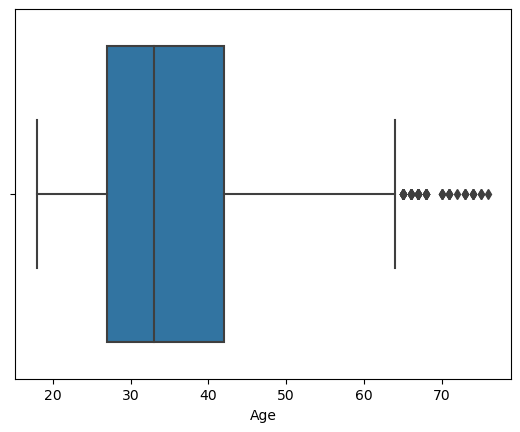

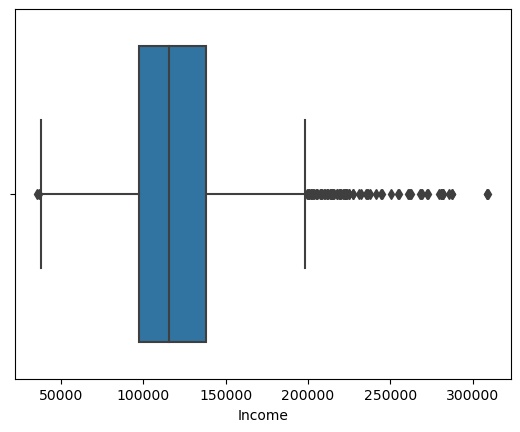

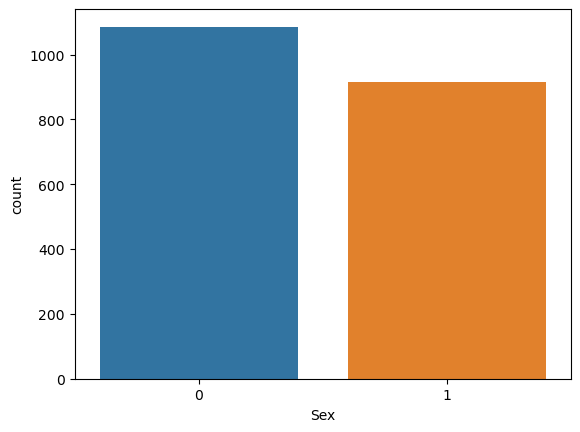

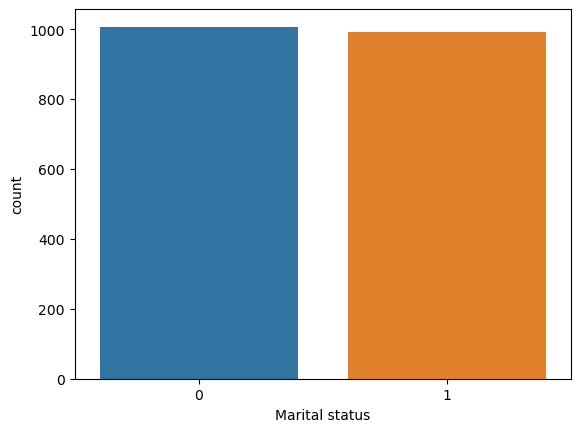

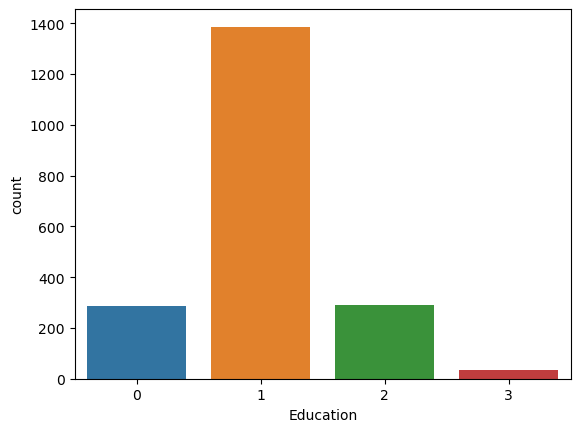

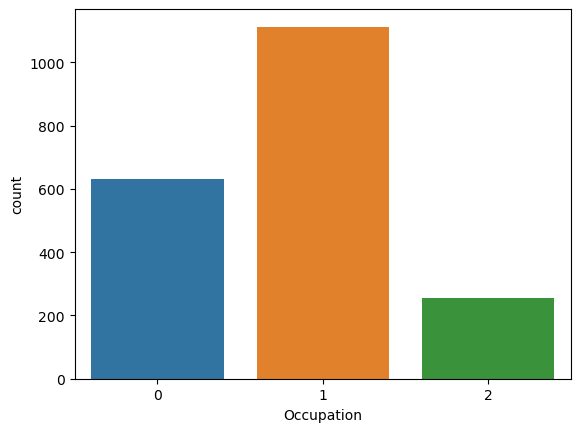

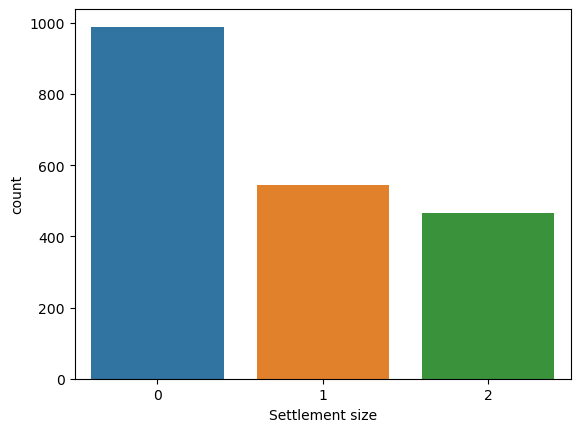

In [5]:
f = plt.figure()
f.set_figwidth(2)
f.set_figheight(4)

for i in numerik:
    plt.figure()
    sns.boxplot(data=numerik, x=i)

for i in kategorik:
    plt.figure()
    sns.countplot(data=kategorik, x=i)


# STandardized Data

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
scaled_data_km = scaler.fit_transform(df.iloc[:,1:])
scaled_data_km


array([[-0.99302433,  2.65361447,  1.60432297,  0.09752361,  0.29682303,
         1.552326  ],
       [ 1.00702467, -1.18713209, -0.06337243,  0.78265438,  0.29682303,
         1.552326  ],
       [-0.99302433,  1.11731585, -0.06337243, -0.83320224, -1.26952539,
        -0.90972951],
       ...,
       [-0.99302433, -0.41898277, -1.73106782, -0.90695688, -1.26952539,
        -0.90972951],
       [ 1.00702467, -1.01643224, -0.06337243, -0.60332923, -1.26952539,
        -0.90972951],
       [-0.99302433, -0.93108232, -1.73106782, -1.3789866 , -1.26952539,
        -0.90972951]])

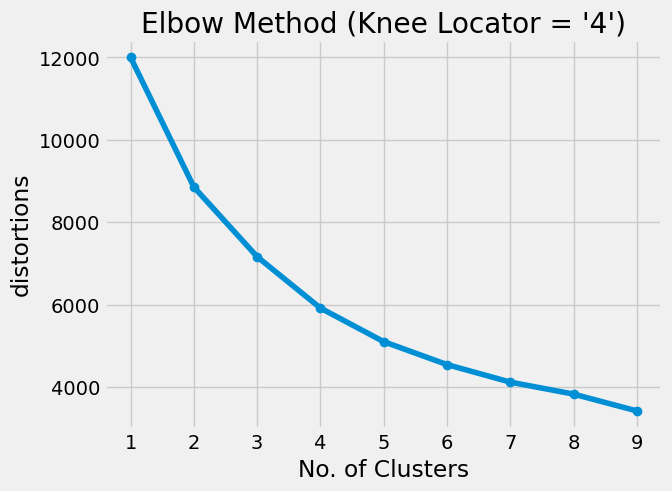

In [24]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering ,KMeans, DBSCAN

n=10
distortions = []
K = range(1,n)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_data_km)
    distortions.append(kmeanModel.inertia_)
from kneed import KneeLocator
kl = KneeLocator(range(1, n), distortions, curve="convex", direction="decreasing")
kl.elbow    
    
plt.style.use("fivethirtyeight")
plt.plot(range(1,n),distortions , marker = "o")
plt.title("Elbow Method (Knee Locator = '{}')".format(kl.elbow))
plt.xlabel("No. of Clusters")
plt.ylabel("distortions")
plt.show()


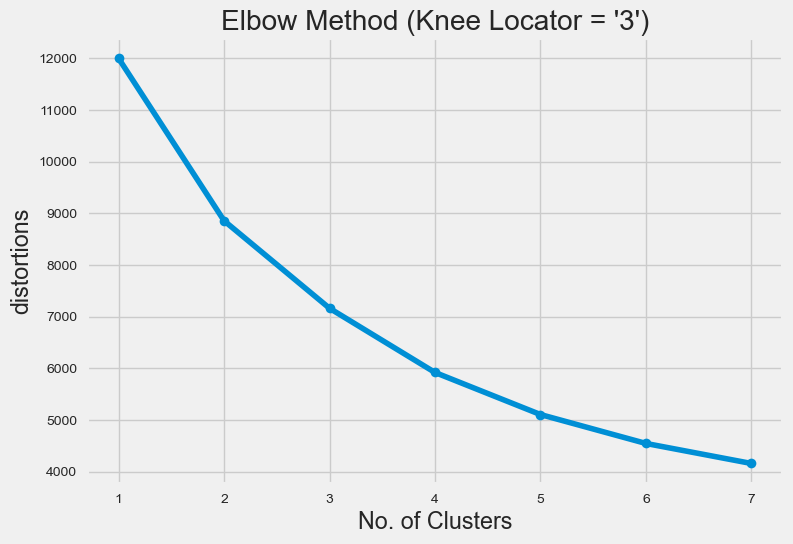

In [22]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering ,KMeans, DBSCAN

n=8
distortions = []
K = range(1,n)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_data_km)
    distortions.append(kmeanModel.inertia_)
from kneed import KneeLocator
kl = KneeLocator(range(1, n), distortions, curve="convex", direction="decreasing")
kl.elbow    
    
plt.style.use("fivethirtyeight")
plt.plot(range(1,n),distortions , marker = "o")
plt.title("Elbow Method (Knee Locator = '{}')".format(kl.elbow))
plt.xlabel("No. of Clusters")
plt.ylabel("distortions")
plt.show()



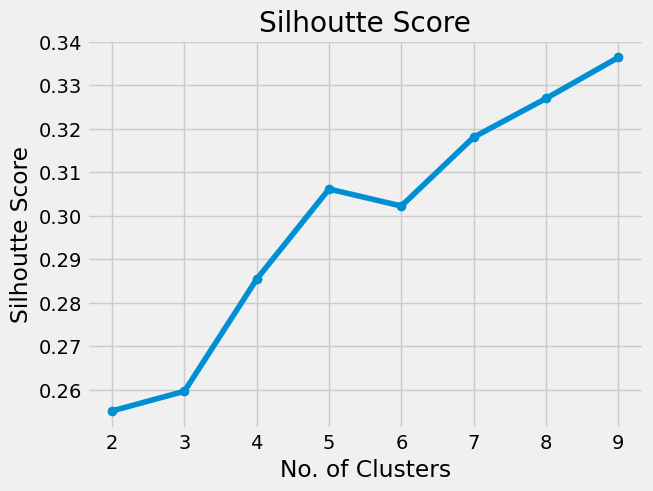

In [10]:
kmean_scores = []
K = range(2,n)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    labels= kmeanModel.fit_predict(scaled_data_km)
    kmean_scores.append(silhouette_score(scaled_data_km, labels))
    
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,n),kmean_scores , marker = "o")
plt.title("Silhoutte Score")
plt.xlabel("No. of Clusters")
plt.ylabel("Silhoutte Score")
plt.show()


In [18]:
kmean_scores

[0.2550943307198448,
 0.259609848567606,
 0.2853910268550787,
 0.30610232261336123,
 0.30219604676434175,
 0.31800762257442305,
 0.32692103465239347,
 0.3363442795527901]

In [20]:
silhouette_score(scaled_data_km, labels,metric='euclidean')

0.3363442795527901

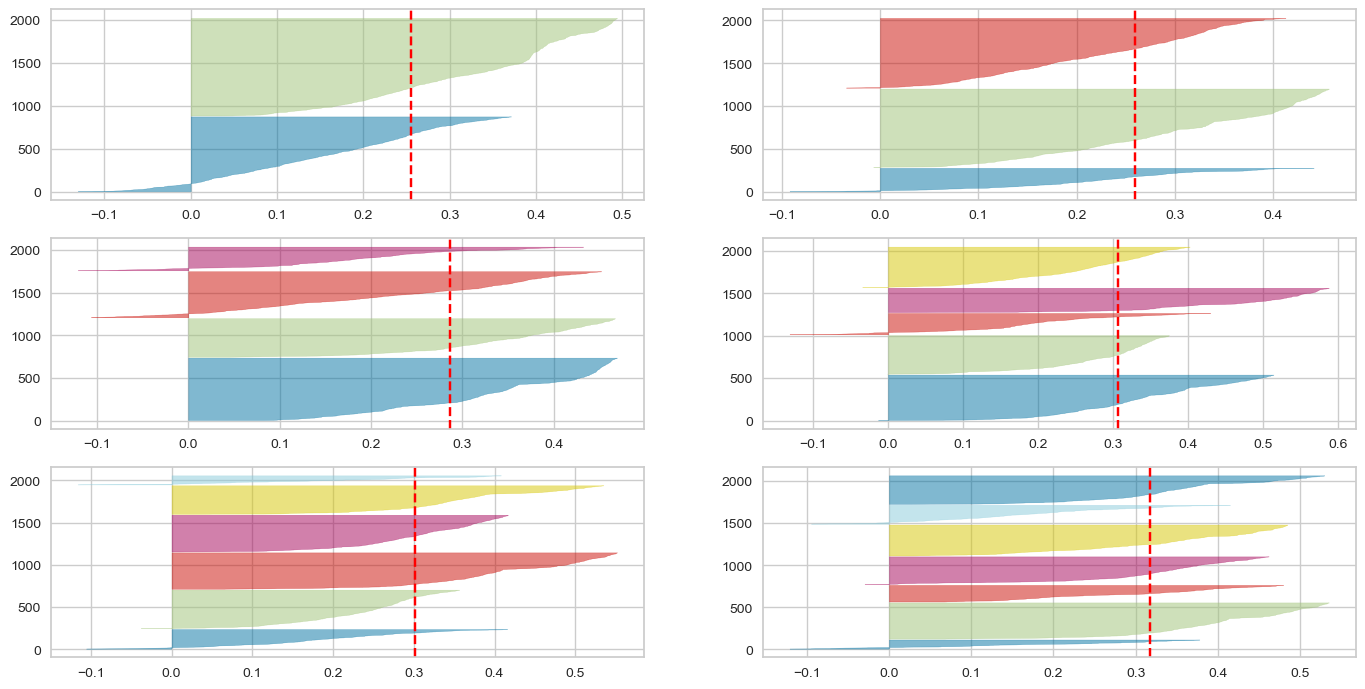

In [17]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_data_km) 


In [25]:
kmeanModel = KMeans(n_clusters=3, random_state=42)
kmeanModel.fit(scaled_data_km)
y_kmeanModel = kmeanModel.fit_predict(scaled_data_km)
y_kmeanModel
    

array([0, 2, 1, ..., 1, 1, 1])

In [26]:
df['label']=y_kmeanModel

In [27]:
df.groupby('label').mean().T

label,0,1,2
Sex,0.501832,0.594092,0.287823
Marital status,0.677656,0.520788,0.408364
Age,55.842491,32.367615,33.196802
Education,2.128205,0.915755,0.809348
Income,155329.014652,97784.470460,135460.038130
Occupation,1.080586,0.381838,1.201722
Settlement size,1.062271,0.021882,1.436654


# K Prototypes

In [6]:
for i in kategorik:
     df2[i]=df2[i].map(str)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sex              2000 non-null   object
 1   Marital status   2000 non-null   object
 2   Age              2000 non-null   int64 
 3   Education        2000 non-null   object
 4   Income           2000 non-null   int64 
 5   Occupation       2000 non-null   object
 6   Settlement size  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [8]:
df2["Age"]

0       67
1       22
2       49
3       45
4       53
        ..
1995    47
1996    27
1997    31
1998    24
1999    25
Name: Age, Length: 2000, dtype: int64

In [12]:

df2_scale=df2.copy()
scaler = StandardScaler()
for i in numerik:
    test= df[i].values #convert to numpy array
    df2_scale[i]=scaler.fit_transform(test.reshape(-1,1))

In [13]:
categorical_features_idx = []
for i in kategorik:
    categorical_features_idx.append(df2_scale.columns.get_loc(i))

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 454, ncost: 862798968718.5785
Run: 1, iteration: 2/20, moves: 294, ncost: 749167631495.2523
Run: 1, iteration: 3/20, moves: 172, ncost: 711613813895.3817
Run: 1, iteration: 4/20, moves: 116, ncost: 695368705616.4166
Run: 1, iteration: 5/20, moves: 71, ncost: 688129366916.5563
Run: 1, iteration: 6/20, moves: 66, ncost: 682699408504.4803
Run: 1, iteration: 7/20, moves: 43, ncost: 680437749857.7899
Run: 1, iteration: 8/20, moves: 26, ncost: 679309048204.7584
Run: 1, iteration: 9/20, moves: 13, ncost: 679031549677.6053
Run: 1, iteration: 10/20, moves: 9, ncost: 678949910789.7358
Run: 1, iteration: 11/20, moves: 8, ncost: 678716799316.9495
Run: 1, iteration: 12/20, moves: 23, ncost: 677978039755.7333
Run: 1, iteration: 13/20, moves: 39, ncost: 676386677772.3492
Run: 1, iteration: 14/20, moves: 27, ncost: 6

Run: 10, iteration: 11/20, moves: 13, ncost: 678716799316.9495
Run: 10, iteration: 12/20, moves: 23, ncost: 677978039755.7333
Run: 10, iteration: 13/20, moves: 39, ncost: 676386677772.3492
Run: 10, iteration: 14/20, moves: 27, ncost: 675593548082.0049
Run: 10, iteration: 15/20, moves: 28, ncost: 674883030243.6611
Run: 10, iteration: 16/20, moves: 26, ncost: 674138522081.0403
Run: 10, iteration: 17/20, moves: 18, ncost: 673635182639.6398
Run: 10, iteration: 18/20, moves: 21, ncost: 673191415725.9996
Run: 10, iteration: 19/20, moves: 9, ncost: 673084836689.106
Run: 10, iteration: 20/20, moves: 3, ncost: 673078349300.6511
Best run was number 3
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 685, ncost: 905955981259.5154
Run: 1, iteration: 2/20, moves: 327, ncost: 760139846207.7632
Run: 1, iteration: 3/20, moves: 194, ncost: 713570187994.644
Run: 1, it

Run: 8, iteration: 5/20, moves: 22, ncost: 674003672033.4591
Run: 8, iteration: 6/20, moves: 23, ncost: 673421023828.643
Run: 8, iteration: 7/20, moves: 18, ncost: 673096142368.5269
Run: 8, iteration: 8/20, moves: 5, ncost: 673078349300.6511
Run: 8, iteration: 9/20, moves: 1, ncost: 673075892851.3536
Run: 8, iteration: 10/20, moves: 1, ncost: 673074950711.55
Run: 8, iteration: 11/20, moves: 0, ncost: 673074950711.55
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/20, moves: 24, ncost: 678303163837.3826
Run: 9, iteration: 2/20, moves: 29, ncost: 677375170538.5138
Run: 9, iteration: 3/20, moves: 44, ncost: 675787378191.6069
Run: 9, iteration: 4/20, moves: 30, ncost: 674987355147.6306
Run: 9, iteration: 5/20, moves: 31, ncost: 674138522081.0403
Run: 9, iteration: 6/20, moves: 18, ncost: 673635182639.6398
Run: 9, iteration: 7/20, moves: 21, ncost: 673191415725.9996
Run: 9, iteration: 8/20, moves: 9, ncost: 673084836689.106
Run: 9, iterat

Starting iterations...
Run: 6, iteration: 1/20, moves: 342, ncost: 740548007073.3744
Run: 6, iteration: 2/20, moves: 193, ncost: 696599119704.6326
Run: 6, iteration: 3/20, moves: 108, ncost: 683366237357.0929
Run: 6, iteration: 4/20, moves: 48, ncost: 679954531802.7493
Run: 6, iteration: 5/20, moves: 25, ncost: 678670526889.1638
Run: 6, iteration: 6/20, moves: 17, ncost: 678312661385.4712
Run: 6, iteration: 7/20, moves: 12, ncost: 677863651622.5857
Run: 6, iteration: 8/20, moves: 18, ncost: 676840714995.5435
Run: 6, iteration: 9/20, moves: 29, ncost: 675580480335.0281
Run: 6, iteration: 10/20, moves: 15, ncost: 675345929807.23
Run: 6, iteration: 11/20, moves: 7, ncost: 675291365877.3168
Run: 6, iteration: 12/20, moves: 1, ncost: 675290329483.3376
Run: 6, iteration: 13/20, moves: 0, ncost: 675290329483.3376
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/20, moves: 548, ncost: 686788486031.466
Run: 7, iteration: 2/20, moves: 152, ncos

Run: 3, iteration: 16/20, moves: 26, ncost: 674138522081.0403
Run: 3, iteration: 17/20, moves: 18, ncost: 673635182639.6398
Run: 3, iteration: 18/20, moves: 21, ncost: 673191415725.9996
Run: 3, iteration: 19/20, moves: 9, ncost: 673084836689.106
Run: 3, iteration: 20/20, moves: 3, ncost: 673078349300.6511
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 176, ncost: 720911915176.2574
Run: 4, iteration: 2/20, moves: 128, ncost: 700072071482.735
Run: 4, iteration: 3/20, moves: 87, ncost: 690803671572.7092
Run: 4, iteration: 4/20, moves: 73, ncost: 684391280476.4208
Run: 4, iteration: 5/20, moves: 52, ncost: 681061954996.951
Run: 4, iteration: 6/20, moves: 37, ncost: 679430759556.1045
Run: 4, iteration: 7/20, moves: 15, ncost: 679031549677.6053
Run: 4, iteration: 8/20, moves: 9, ncost: 678949910789.7358
Run: 4, iteration: 9/20, moves: 8, ncost: 678716799316.9495
Run: 4, iteration: 10/20, moves: 23, ncost: 677978039755.7333
Run:

Run: 1, iteration: 13/20, moves: 26, ncost: 674138522081.0403
Run: 1, iteration: 14/20, moves: 18, ncost: 673635182639.6398
Run: 1, iteration: 15/20, moves: 21, ncost: 673191415725.9996
Run: 1, iteration: 16/20, moves: 9, ncost: 673084836689.106
Run: 1, iteration: 17/20, moves: 3, ncost: 673078349300.6511
Run: 1, iteration: 18/20, moves: 1, ncost: 673075892851.3536
Run: 1, iteration: 19/20, moves: 1, ncost: 673074950711.55
Run: 1, iteration: 20/20, moves: 0, ncost: 673074950711.55
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 612, ncost: 1206321198886.9866
Run: 2, iteration: 2/20, moves: 576, ncost: 882603069610.9918
Run: 2, iteration: 3/20, moves: 329, ncost: 753632457883.5988
Run: 2, iteration: 4/20, moves: 185, ncost: 712125628327.2617
Run: 2, iteration: 5/20, moves: 120, ncost: 695433205623.1202
Run: 2, iteration: 6/20, moves: 72, ncost: 688129366916.5563
Run: 2, iteration: 7/20, moves: 66, ncost: 682699408504.4803
R

Run: 9, iteration: 13/20, moves: 39, ncost: 676386677772.3492
Run: 9, iteration: 14/20, moves: 27, ncost: 675593548082.0049
Run: 9, iteration: 15/20, moves: 28, ncost: 674883030243.6611
Run: 9, iteration: 16/20, moves: 26, ncost: 674138522081.0403
Run: 9, iteration: 17/20, moves: 18, ncost: 673635182639.6398
Run: 9, iteration: 18/20, moves: 21, ncost: 673191415725.9996
Run: 9, iteration: 19/20, moves: 9, ncost: 673084836689.106
Run: 9, iteration: 20/20, moves: 3, ncost: 673078349300.6511
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/20, moves: 422, ncost: 855765482204.8167
Run: 10, iteration: 2/20, moves: 294, ncost: 747236179018.8228
Run: 10, iteration: 3/20, moves: 175, ncost: 710033500643.8019
Run: 10, iteration: 4/20, moves: 112, ncost: 694804193420.5784
Run: 10, iteration: 5/20, moves: 67, ncost: 688129366916.5563
Run: 10, iteration: 6/20, moves: 66, ncost: 682699408504.4803
Run: 10, iteration: 7/20, moves: 43, ncost: 6804377

Run: 7, iteration: 1/20, moves: 190, ncost: 680469542909.7007
Run: 7, iteration: 2/20, moves: 56, ncost: 677714023667.6205
Run: 7, iteration: 3/20, moves: 32, ncost: 676449258681.0731
Run: 7, iteration: 4/20, moves: 27, ncost: 675539654342.7999
Run: 7, iteration: 5/20, moves: 14, ncost: 675345929807.23
Run: 7, iteration: 6/20, moves: 7, ncost: 675291365877.3168
Run: 7, iteration: 7/20, moves: 1, ncost: 675290329483.3376
Run: 7, iteration: 8/20, moves: 0, ncost: 675290329483.3376
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/20, moves: 342, ncost: 727733309649.1833
Run: 8, iteration: 2/20, moves: 165, ncost: 693370114238.536
Run: 8, iteration: 3/20, moves: 93, ncost: 682916375092.35
Run: 8, iteration: 4/20, moves: 47, ncost: 679821138802.131
Run: 8, iteration: 5/20, moves: 22, ncost: 678654138695.9653
Run: 8, iteration: 6/20, moves: 16, ncost: 678312661385.4712
Run: 8, iteration: 7/20, moves: 12, ncost: 677863651622.5857
Run: 8, ite

Run: 4, iteration: 6/20, moves: 2, ncost: 675290329483.3376
Run: 4, iteration: 7/20, moves: 0, ncost: 675290329483.3376
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/20, moves: 347, ncost: 814737358855.0763
Run: 5, iteration: 2/20, moves: 258, ncost: 734291006672.059
Run: 5, iteration: 3/20, moves: 161, ncost: 703781655903.4033
Run: 5, iteration: 4/20, moves: 95, ncost: 692216316790.0769
Run: 5, iteration: 5/20, moves: 72, ncost: 685590364034.6116
Run: 5, iteration: 6/20, moves: 62, ncost: 681358029693.6658
Run: 5, iteration: 7/20, moves: 38, ncost: 679616200916.4596
Run: 5, iteration: 8/20, moves: 19, ncost: 679041984658.0918
Run: 5, iteration: 9/20, moves: 6, ncost: 678981477049.7738
Run: 5, iteration: 10/20, moves: 13, ncost: 678716799316.9495
Run: 5, iteration: 11/20, moves: 23, ncost: 677978039755.7333
Run: 5, iteration: 12/20, moves: 39, ncost: 676386677772.3492
Run: 5, iteration: 13/20, moves: 27, ncost: 675593548082.0049
Ru

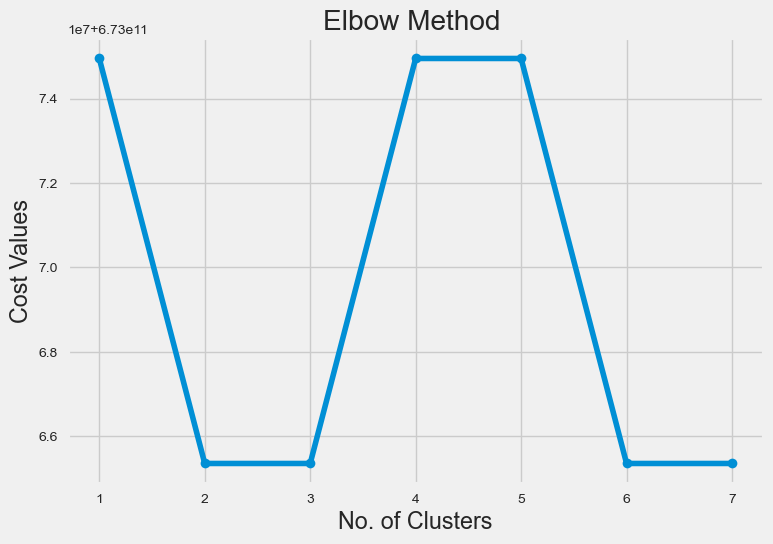

In [78]:


n=8
cost_value = []
K = range(1,n)
for k in K:
    kproto = KPrototypes(n_clusters=3,verbose=2, max_iter=20)
    kproto.fit(df2_scale.values, categorical=categorical_features_idx)
    cost_value.append(kproto.cost_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,n),cost_value , marker = "o")
plt.title("Elbow Method ")
plt.xlabel("No. of Clusters")
plt.ylabel("Cost Values")
plt.show()



In [17]:
kproto = KPrototypes(n_clusters=3, max_iter=20, random_state=42)
kproto.fit(df2_scale.values, categorical=categorical_features_idx)


KPrototypes(gamma=0.5, max_iter=20, n_clusters=3, random_state=42)

In [18]:
clusters = kproto.predict(df2_scale.values, categorical=categorical_features_idx)


In [45]:
data['label_kmeans']=y_kmeanModel
data['label_kprot']=clusters

In [30]:
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,label_kmeans,label_kprot
0,100000001,0,0,67,2,124670,1,2,0,1
1,100000002,1,1,22,1,150773,1,2,2,0
2,100000003,0,0,49,1,89210,0,0,1,2
3,100000004,0,0,45,1,171565,1,1,2,1
4,100000005,0,0,53,1,149031,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,1,0
1996,100001997,1,1,27,1,117744,1,0,1,2
1997,100001998,0,0,31,0,86400,0,0,1,2
1998,100001999,1,1,24,1,97968,0,0,1,2


In [32]:
data.to_csv("hasilkmeanskproto.csv")

In [46]:
from sklearn import metrics
metrics.confusion_matrix(data['label_kmeans'],data['label_kprot'])



array([[ 22, 247,   4],
       [140,  34, 740],
       [548,  79, 186]], dtype=int64)

Tabel persilangan belum bisa dijadikan untuk perbandingan pembentukan cluster, karena nilai diagonal dari confusion matrix belum optimal. Artinya bisa saja cluster yang dimaksud adalah sama namun pelabelan cluster yang berbeda. Akan dilakukan transformasi baris (atau kolom, pilih salah satu) dari matriks tersebut agar nilai diagonal dari matriks adalah maksimum. Hal ini berarti mengubah label k means atau label k prot sedemikian rupa sehingga penjumlahan nilai diagonal mencapai nilai maksimum. 

In [48]:
#Manually
for i in range(len(data['label_kmeans'])):
    if data['label_kmeans'][i]==2:
        data['label_kmeans'][i]=0
    elif data['label_kmeans'][i]==1:
        data['label_kmeans'][i]=2
    elif data['label_kmeans'][i]==0:
        data['label_kmeans'][i]=1

        

C:\Users\istyw\AppData\Local\Temp\ipykernel_16940\1955532487.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label_kmeans'][i]=1
C:\Users\istyw\AppData\Local\Temp\ipykernel_16940\1955532487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label_kmeans'][i]=0
C:\Users\istyw\AppData\Local\Temp\ipykernel_16940\1955532487.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label_kmeans'][i]=2


In [53]:
print("same cluster: ", metrics.accuracy_score(data['label_kmeans'],data['label_kprot']),'\n',
metrics.confusion_matrix(data['label_kmeans'],data['label_kprot']))

same cluster:  0.7675 
 [[548  79 186]
 [ 22 247   4]
 [140  34 740]]


Terdapat 76.75% dari observasi yang dikelompokkan kedalam cluster yang sama antara merode kmeans dan k prototype

In [ ]:
confusion_matrix=metrics.confusion_matrix(data['label_kmeans'],data['label_kprot'])


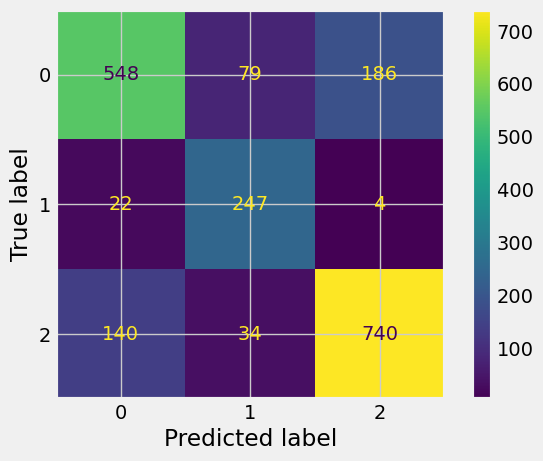

In [42]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0','1','2'])
cm_display.plot()
plt.show()
